In [5]:
from matplotlib import pyplot as plt

In [1]:
import grad_desc as gd
import pprint

# **1 e 2**

## "Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna)."

## "Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente."

In [3]:
results = gd.run(messages = True)

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
For values of:
b = 0.010029093861364507
m = 0.17483245665563385
The RSS is 2648.2381266261386
Gradient size: 0.17511987501115955
For values of:
b = 0.019496718042658713
m = 0.3402328195038894
The RSS is 2381.1735926230144
Gradient size: 0.3407909821019346
For values of:
b = 0.028433167538002242
m = 0.4967100089829696
The RSS is 2142.151013653971
Gradient size: 0.49752314322060015
For values of:
b = 0.03686710273711365
m = 0.6447454860906212
The RSS is 1928.2259499305476
Gradient size: 0.6457986722643988
For values of:
b = 0.044825637622440746
m = 0.7847947339926804
The RSS is 1736.7631314659504
Gradient size: 0.7860738593102434
For values of:
b = 0.052334423207504185
m = 0.9172886596895711
The RSS is 1565.4039948653665
Gradient size: 0.9187803747618644
For values of:
b = 0.059417726473220564
m = 1.0426349200541294
The RSS is 1412.0376287932477
Gradient size: 1.0443265977344096
For values of:
b = 0.06609850

# **3**

## "O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações."

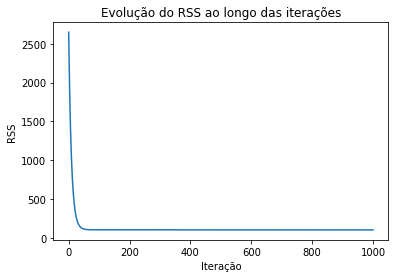

In [4]:
plt.plot(results["iterations"], results['RSS'])
plt.title("Evolução do RSS ao longo das iterações")
plt.xlabel("Iteração")
plt.ylabel("RSS")
plt.show()

O RSS diminui com as iterações.

# **4**

## Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

Após algumas explorações, encontramos os valores de
learning rate = 0.00097
Número de Iterações = 15000

Que possuem os valores mais aproximados w0 e w1 de -39 e 5 respectivamente.

# **5**

## O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

In [5]:
results = gd.run(messages = False,
                 stopping_criteria = 2, gradient_threshold = 4)

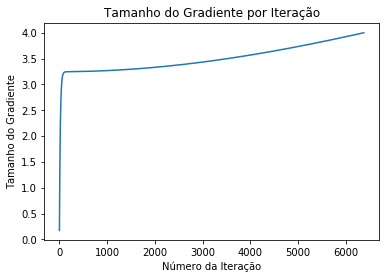

In [6]:
plt.plot(results["iterations"], results["gradient_size"])
plt.title("Tamanho do Gradiente por Iteração")
plt.xlabel("Número da Iteração")
plt.ylabel("Tamanho do Gradiente")
plt.show()

# **6**

## Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

Fixando o valor da *learning rate* no encontrado no item 4, faremos uma exploração de limites
até um ponto que seja razoável.

In [2]:
threshold = 0
b_list = []
m_list = []
threshold_list = []

while threshold <= 5:
    results = gd.run(messages = False, learning_rate = 0.00001,
                     stopping_criteria = 2, gradient_threshold = threshold)
    
#    b_list.append(results['b'])
#    m_list.append(results['m'])
    threshold_list.append(threshold)
    
    threshold += 1
    
print(results['gradient_size'])
#plt.plot(threshold_list, results['gradient_size'])
#plt.show()

0.030087281584093527 0.5244973699669015
1504.3640792046763 26224.868498345077
0.06017456316818704 1.048994739933803
3008.7281584093516 52449.73699669015
0.09026184475228057 1.5734921099007046
4513.092237614028 78674.60549503523
0.1203491263363741 2.097989479867606
6017.456316818704 104899.47399338029
0.1504364079204676 2.6224868498345075
7521.82039602338 131124.34249172537
0.1805236895045612 3.146984219801409
9026.18447522806 157349.21099007042
0.2106109710886548 3.67148158976831
10530.54855443274 183574.0794884155
0.24069825267274844 4.195978959735212
12034.912633637421 209798.94798676058
0.27078553425684204 4.720476329702113
13539.276712842102 236023.81648510566
0.30087281584093567 5.244973699669015
15043.640792046783 262248.68498345074
0.33096009742502924 5.769471069635916
16548.00487125146 288473.55348179577
0.3610473790091227 6.293968439602816
18052.368950456133 314698.4219801408
0.3911346605932161 6.818465809569717
19556.733029660805 340923.2904784858
0.42122194217730957 7.342963

KeyboardInterrupt: 

Podemos ter uma ideia de que quando o limite para o tamanho do gradiente se aproxima de 40, obtemos os valores desejados.

De fato, podemos ver que ao executarmos o algoritmo com um limite de 39, obteremos:

In [32]:
results = gd.run(messages = False, learning_rate = 0.00097,
                     stopping_criteria = 2, gradient_threshold = 39)
print("w0: {0}\nw1: {1}".format(results['b'], results['m']))

w0: -38.60325270087434
w1: 5.549300569235324


In [ ]:
Os valores não são exatamente os mesmos porém são suficientemente próximos.